## 赛事介绍
实时对战游戏是人工智能研究领域的一个热点。由于游戏复杂性、部分可观察和动态实时变化战局等游戏特点使得研究变得比较困难。我们可以在选择英雄阶段预测胜负概率，也可以在比赛期间根据比赛实时数据进行建模。那么我们英雄联盟对局进行期间，能知道自己的胜率吗？

![](https://ai-studio-static-online.cdn.bcebos.com/9739d3ca3cef4e32989a541af450a9556e91bf89a4e946e0a856cc2424321638)


## 赛事任务
比赛数据使用了英雄联盟玩家的实时游戏数据，记录下用户在游戏中对局数据（如击杀数、住物理伤害）。希望参赛选手能从数据集中挖掘出数据的规律，并预测玩家在本局游戏中的输赢情况。

赛题训练集案例如下：
- 训练集18万数据；
- 测试集2万条数据；

```plain
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv.zip')
```

对于数据集中每一行为一个玩家的游戏数据，数据字段如下所示：

* id：玩家记录id
* win：是否胜利，标签变量
* kills：击杀次数
* deaths：死亡次数
* assists：助攻次数
* largestkillingspree：最大 killing spree（游戏术语，意味大杀特杀。当你连续杀死三个对方英雄而中途没有死亡时）
* largestmultikill：最大mult ikill（游戏术语，短时间内多重击杀）
* longesttimespentliving：最长存活时间
* doublekills：doublekills次数
* triplekills：doublekills次数
* quadrakills：quadrakills次数
* pentakills：pentakills次数
* totdmgdealt：总伤害
* magicdmgdealt：魔法伤害
* physicaldmgdealt：物理伤害
* truedmgdealt：真实伤害
* largestcrit：最大暴击伤害
* totdmgtochamp：对对方玩家的伤害
* magicdmgtochamp：对对方玩家的魔法伤害
* physdmgtochamp：对对方玩家的物理伤害
* truedmgtochamp：对对方玩家的真实伤害
* totheal：治疗量
* totunitshealed：痊愈的总单位
* dmgtoturrets：对炮塔的伤害
* timecc：法控时间
* totdmgtaken：承受的伤害
* magicdmgtaken：承受的魔法伤害
* physdmgtaken：承受的物理伤害
* truedmgtaken：承受的真实伤害
* wardsplaced：侦查守卫放置次数
* wardskilled：侦查守卫摧毁次数
* firstblood：是否为firstblood
测试集中label字段win为空，需要选手预测。

##  评审规则

1. 数据说明

选手需要提交测试集队伍排名预测，具体的提交格式如下：

```plain
win
0
1
1
0
```

 2. 评估指标

本次竞赛的使用准确率进行评分，数值越高精度越高，评估代码参考：

```
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)
```

## Baseline使用指导
1、点击‘fork按钮’，出现‘fork项目’弹窗         
2、点击‘创建按钮’ ，出现‘运行项目’弹窗    
3、点击‘运行项目’，自动跳转至新页面      
4、点击‘启动环境’ ，出现‘选择运行环境’弹窗     
5、选择运行环境（启动项目需要时间，请耐心等待），出现‘环境启动成功’弹窗，点击确定        
6、点击进入环境，即可进入notebook环境      
7、鼠标移至下方每个代码块内（代码块左侧边框会变成浅蓝色），再依次点击每个代码块左上角的‘三角形运行按钮’，待一个模块运行完以后再运行下一个模块，直至全部运行完成  
![](https://ai-studio-static-online.cdn.bcebos.com/226c72f88f5b4e9d8a55e59129e4c79770aa200f10ef413ca1420ae7d273bc88)  
![](https://ai-studio-static-online.cdn.bcebos.com/866a22a341d64166aaf9a8a3abee09b5a6e2d0cba1c649bb8bdef6b2ad7955f1)  
8、下载页面左侧submission.zip压缩包  
![](https://ai-studio-static-online.cdn.bcebos.com/b7f3076301e34462abaf2013dcdbf10a5dcbfe287d5845f1869493e578391f7a)  
9、在比赛页提交submission.zip压缩包，等待系统评测结束后，即可登榜！    
![](https://ai-studio-static-online.cdn.bcebos.com/95a9fc4140144a2d8a76258f7a536751c5c6969994154d3da71c80e23757c6c8)  
10、点击页面左侧‘版本-生成新版本’  
![](https://ai-studio-static-online.cdn.bcebos.com/e62d0f5ca1454f7485c3eb1351823315480356cafad143c2ab2ff065f95104fe)  
11、填写‘版本名称’，点击‘生成版本按钮’，即可在个人主页查看到该项目（可选择公开此项目哦）  

In [1]:
import pandas as pd
import paddle
import numpy as np
%pylab inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

train_df = pd.read_csv('data/data137276/train.csv.zip')
test_df = pd.read_csv('data/data137276/test.csv.zip')

train_df = train_df.drop(['id', 'timecc'], axis=1)
test_df = test_df.drop(['id', 'timecc'], axis=1)

#train_df = train_df.drop(['id', 'timecc','magicdmgdealt','physicaldmgdealt','truedmgdealt','magicdmgtochamp','physdmgtochamp','truedmgtochamp','magicdmgtaken','physdmgtaken','truedmgtaken','largestcrit'], axis=1)
#test_df = test_df.drop(['id', 'timecc','magicdmgdealt','physicaldmgdealt','truedmgdealt','magicdmgtochamp','physdmgtochamp','truedmgtochamp','magicdmgtaken','physdmgtaken','truedmgtaken','largestcrit'], axis=1)
'''train_df['KDA'] = (train_df['kills']+train_df['assists'])/(train_df['deaths']+0.01)
train_df['ctrate'] = train_df['totdmgtochamp']/(train_df['totdmgtaken']+1)
train_df = train_df.drop(['totdmgtochamp','totdmgtaken'],axis=1)
test_df['KDA'] = (test_df['kills']+test_df['assists'])/(test_df['deaths']+0.01)
test_df['ctrate'] = test_df['totdmgtochamp']/(test_df['totdmgtaken']+1)
test_df = test_df.drop(['totdmgtochamp','totdmgtaken'],axis=1)
train_df['delete'] = train_df['KDA']*train_df['deaths']
train_df = train_df.drop(index=train_df[train_df['delete']==0].index[:])
train_df = train_df.drop(['delete'],axis=1)'''

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


Populating the interactive namespace from numpy and matplotlib


"train_df['KDA'] = (train_df['kills']+train_df['assists'])/(train_df['deaths']+0.01)\ntrain_df['ctrate'] = train_df['totdmgtochamp']/(train_df['totdmgtaken']+1)\ntrain_df = train_df.drop(['totdmgtochamp','totdmgtaken'],axis=1)\ntest_df['KDA'] = (test_df['kills']+test_df['assists'])/(test_df['deaths']+0.01)\ntest_df['ctrate'] = test_df['totdmgtochamp']/(test_df['totdmgtaken']+1)\ntest_df = test_df.drop(['totdmgtochamp','totdmgtaken'],axis=1)\ntrain_df['delete'] = train_df['KDA']*train_df['deaths']\ntrain_df = train_df.drop(index=train_df[train_df['delete']==0].index[:])\ntrain_df = train_df.drop(['delete'],axis=1)"

## 数据分析

In [2]:
train_df.isnull().mean(0)

win                       0.0
kills                     0.0
deaths                    0.0
assists                   0.0
largestkillingspree       0.0
largestmultikill          0.0
longesttimespentliving    0.0
doublekills               0.0
triplekills               0.0
quadrakills               0.0
pentakills                0.0
totdmgdealt               0.0
magicdmgdealt             0.0
physicaldmgdealt          0.0
truedmgdealt              0.0
largestcrit               0.0
totdmgtochamp             0.0
magicdmgtochamp           0.0
physdmgtochamp            0.0
truedmgtochamp            0.0
totheal                   0.0
totunitshealed            0.0
dmgtoturrets              0.0
totdmgtaken               0.0
magicdmgtaken             0.0
physdmgtaken              0.0
truedmgtaken              0.0
wardsplaced               0.0
wardskilled               0.0
firstblood                0.0
dtype: float64

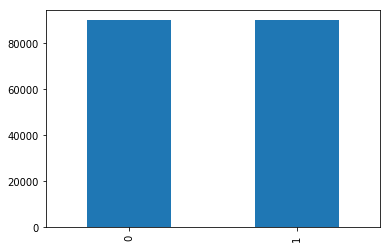

In [ ]:
train_df['win'].value_counts().plot(kind='bar')

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/distributions.py:179: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, np.float)


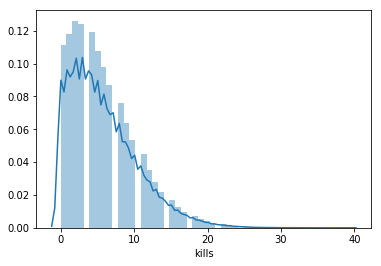

In [ ]:
sns.distplot(train_df['kills'])

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/distributions.py:179: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, np.float)


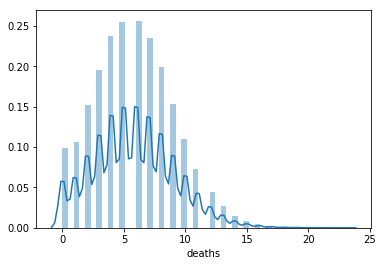

In [ ]:
sns.distplot(train_df['deaths'])

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float

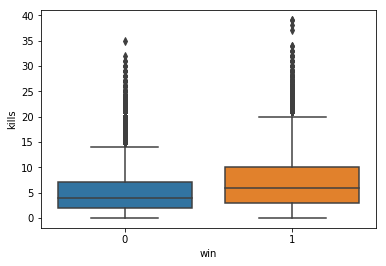

In [ ]:
sns.boxplot(y='kills', x='win', data=train_df)

Text(0,0.5,'deaths')

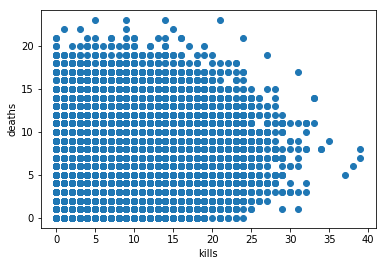

In [3]:
plt.scatter(train_df['kills'], train_df['deaths'])
plt.xlabel('kills')
plt.ylabel('deaths')

In [4]:
for col in train_df.columns[1:]:
    train_df[col] /= train_df[col].max()
    test_df[col] /= test_df[col].max()

Text(0.5,1,'Correlation between features')

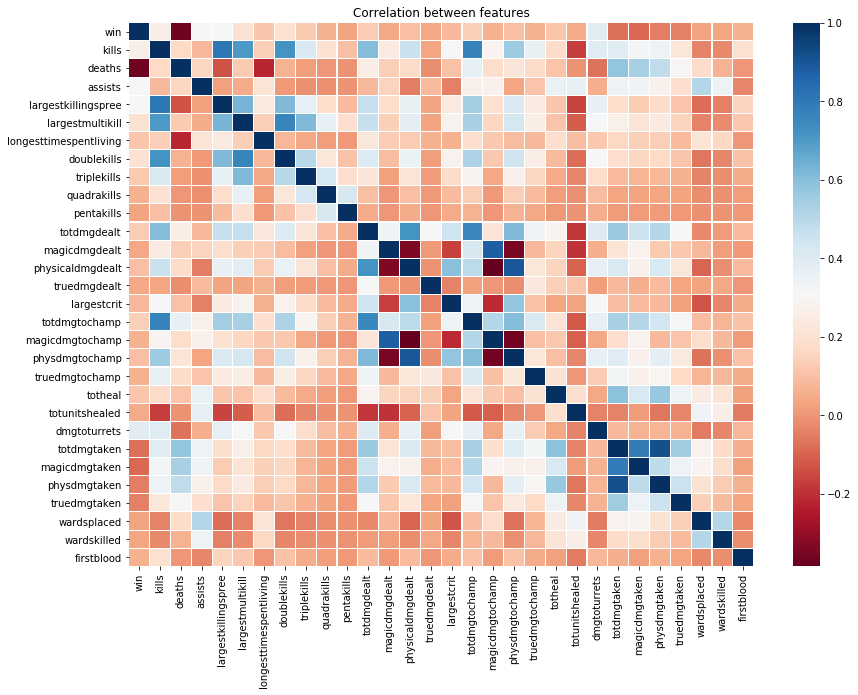

In [5]:
corr = train_df.corr()
fig, ax= plt.subplots(figsize = (14, 10))
sns.heatmap(corr,cmap='RdBu', linewidths = 0.05, ax = ax)
ax.set_title('Correlation between features')

In [6]:
def print_corr_col(corr,val):
    col_name = corr.columns
    for i in range(len(corr)):
        corr.iloc[i,i]=0
        l = corr.iloc[i,:].abs()>val
        if l.sum()>0:
            print("与",col_name[i],"特征相关度大的列有",col_name[l.values].tolist())
print_corr_col(corr,0.9)

与 totdmgtaken 特征相关度大的列有 ['physdmgtaken']
与 physdmgtaken 特征相关度大的列有 ['totdmgtaken']


In [7]:
train_df = train_df.drop(['physdmgtaken','totdmgtaken'],axis=1)
test_df = test_df.drop(['physdmgtaken','totdmgtaken'],axis=1)

## 搭建模型

In [8]:
class Classifier(paddle.nn.Layer):
    # self代表类的实例自身
    def __init__(self):
        # 初始化父类中的一些参数
        super(Classifier, self).__init__()
        
        self.fc1 = paddle.nn.Linear(in_features=27, out_features=40)
        self.fc2 = paddle.nn.Linear(in_features=40, out_features=512)
        self.fc3 = paddle.nn.Linear(in_features=512, out_features=256)
        self.fc4 = paddle.nn.Linear(in_features=256, out_features=128)
        self.fc5 = paddle.nn.Linear(in_features=128, out_features=512)
        self.fc6 = paddle.nn.Linear(in_features=512, out_features=256)
        self.fc7 = paddle.nn.Linear(in_features=256, out_features=128)
        self.fc8 = paddle.nn.Linear(in_features=128, out_features=1)
        self.relu = paddle.nn.ReLU()
    
    # 网络的前向计算
    def forward(self, inputs):
        x = self.relu(self.fc1(inputs))
        x = self.fc2(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.fc5(x)
        x = self.relu(self.fc6(x))
        x = self.fc7(x)
        x = self.fc8(x)
        return x

In [9]:
model = Classifier()
model.train()
opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
loss_fn = paddle.nn.BCEWithLogitsLoss()

W0703 20:58:47.204589 12772 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 10.1
W0703 20:58:47.209224 12772 device_context.cc:465] device: 0, cuDNN Version: 7.6.


In [10]:
EPOCH_NUM = 80   # 设置外层循环次数
BATCH_SIZE = 20  # 设置batch大小
training_data = train_df.iloc[:-1000,].values.astype(np.float32)
val_data = train_df.iloc[-1000:, ].values.astype(np.float32)

# 定义外层循环
for epoch_id in range(EPOCH_NUM):
    # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
    
    np.random.shuffle(training_data)
    
    # 将训练数据进行拆分，每个batch包含10条数据
    mini_batches = [training_data[k:k+BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]
    
    # 定义内层循环
    for iter_id, mini_batch in enumerate(mini_batches):
        x = np.array(mini_batch[:, 1:]) # 获得当前批次训练数据
        y = np.array(mini_batch[:, :1]) # 获得当前批次训练标签
        
        # 将numpy数据转为飞桨动态图tensor的格式
        features = paddle.to_tensor(x)
        y = paddle.to_tensor(y)
        
        # 前向计算
        predicts = model(features)
        
        # 计算损失
        loss = loss_fn(predicts, y, )
        avg_loss = paddle.mean(loss)
        if iter_id%200==0:
            acc = (predicts > 0).astype(int).flatten() == y.flatten().astype(int)
            acc = acc.astype(float).mean()

            print("epoch: {}, iter: {}, loss is: {}, acc is {}".format(epoch_id, iter_id, avg_loss.numpy(), acc.numpy()))
        
        # 反向传播，计算每层参数的梯度值
        avg_loss.backward()
        # 更新参数，根据设置好的学习率迭代一步
        opt.step()
        # 清空梯度变量，以备下一轮计算
        opt.clear_grad()

In [11]:
model.eval()
test_data = paddle.to_tensor(test_df.values.astype(np.float32))
test_predict = model(test_data)
test_predict = (test_predict > 0).astype(int).flatten()

In [12]:
pd.DataFrame({'win':
              test_predict.numpy()
             }).to_csv('submission.csv', index=None)

!zip submission.zip submission.csv

  adding: submission.csv (deflated 90%)


## 总结与上分点

1. 原始赛题字段存在关联，可以进一步提取交叉特征。
2. 模型训练过程中可以加入验证集验证过程。